In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)

names = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']

X=data[names]
Y=data[['Balance']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [2]:
N = 100
lambdas = 2*np.logspace(0, 3, N)
n = 7
coefs_not = np.zeros((N, n))
scores_not = np.zeros(N)
for i in range(N):
    clf = linear_model.Lasso(alpha=lambdas[i])
    clf.fit(X_train, Y_train)
    coefs_not[i, 0] = clf.intercept_
    coefs_not[i, 1:] = clf.coef_
    scores_not[i] = clf.score(X_test, Y_test)

/home/juan/.anaconda3/lib/python3.4/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


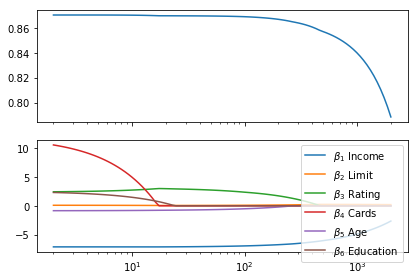

In [3]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(lambdas, scores_not)

for i in range(1, n):
    ax2.plot(lambdas, coefs_not[:, i], label=r"$\beta_%d$ %s"%(i, names[i-1]))
    
ax2.set_xscale('log')
ax2.legend()
fig.tight_layout()
plt.show()

In [4]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_ = scaler.transform(X_train)
X_test_ = scaler.transform(X_test)

scaler = preprocessing.StandardScaler().fit(Y_train)
Y_train_ = scaler.transform(Y_train)
Y_test_ = scaler.transform(Y_test)

In [5]:
coefs_norm = np.zeros((N, n))
scores_norm = np.zeros(N)

lambdas = 2*np.logspace(-3, 0, N)
for i in range(N):
    clf = linear_model.Lasso(alpha=lambdas[i])
    clf.fit(X_train_, Y_train_)
    coefs_norm[i, 0] = clf.intercept_
    coefs_norm[i, 1:] = clf.coef_
    #scores_norm[i] = clf.score(X_test_, Y_test_)
    scores_norm[i] = clf.score(X_train_, Y_train_)

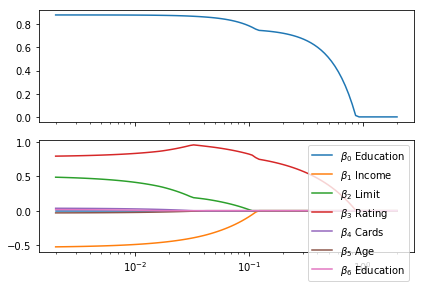

In [6]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(lambdas, scores_norm)

for i in range(n):
    ax2.plot(lambdas, coefs_norm[:, i], label=r"$\beta_%d$ %s"%(i, names[i-1]))

ax2.set_xscale('log')
ax2.legend()
fig.tight_layout()
plt.show()